In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load the dataset into python environment 2. Make 'PassengerId' as the index column**

In [76]:
t_data = pd.read_csv('titanic_dataset.csv', index_col = 'PassengerId')
t_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**3. Check the basic details of the dataset**

In [77]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Checking null values**

In [78]:
t_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**4. Fill in all the missing values present in all the columns in the dataset**

In [79]:
#'Cabin' has 687 null entries out of total 891, so dropping that column

t_data = t_data.drop(['Cabin'], axis = 1)

#filling 'Embarked' column with mode value since it is object type

t_data['Embarked'] = t_data['Embarked'].fillna(t_data['Embarked'].mode()[0])

#filling 'Age' columns with mean value as it has a normal distribution

t_data['Age'] = t_data['Age'].fillna(t_data['Age'].mean())

In [80]:
t_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

**5. Check and handle outliers in at least 3 columns in the dataset**

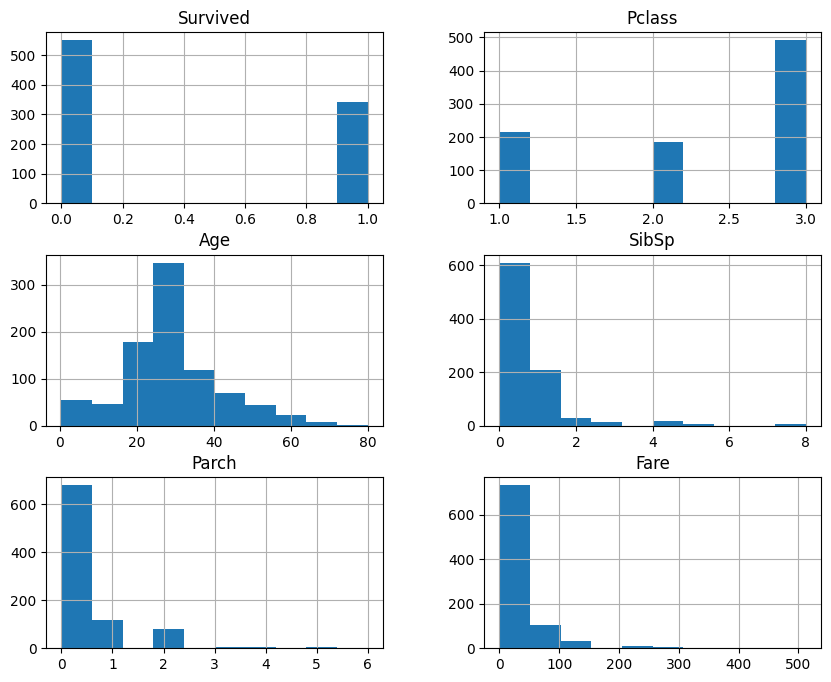

In [81]:
#plotting all numerical column values to check outliers

data_plot = t_data.select_dtypes(include =['float64','int64'])
data_plot.hist(figsize = (10,8));

Plotting boxplot for 'SibSp', 'Parch' and 'Fare' which have outliers

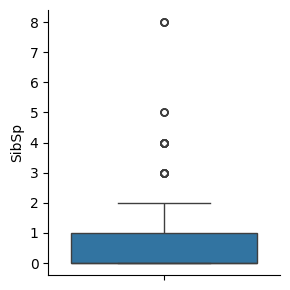

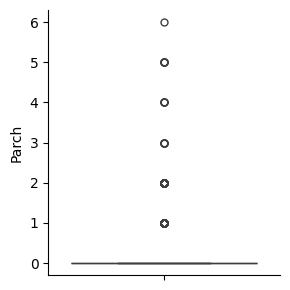

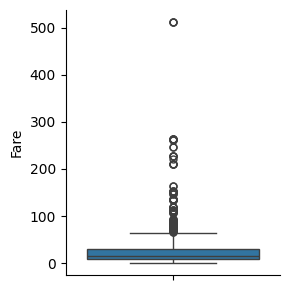

In [82]:
num_col = ['SibSp', 'Parch', 'Fare']
for i in num_col:
  sns.catplot(data = t_data[i], kind = 'box', height = 3)
  plt.show()

Handling Outliers

Using zscore for 'Parch'

In [83]:
from scipy.stats import zscore
z_scores = zscore(t_data['Parch'])
print(z_scores)

PassengerId
1     -0.473674
2     -0.473674
3     -0.473674
4     -0.473674
5     -0.473674
         ...   
887   -0.473674
888   -0.473674
889    2.008933
890   -0.473674
891   -0.473674
Name: Parch, Length: 891, dtype: float64


In [85]:
threshold = 3
outliers_index = t_data.index[(z_scores > threshold) | (z_scores < -threshold)]
print(outliers_index)
t_data_final = t_data.drop(outliers_index)

Int64Index([14, 26, 87, 168, 361, 438, 439, 568, 611, 639, 679, 737, 775, 859,
            886],
           dtype='int64', name='PassengerId')


Handling Outlier for 'SibSp' and 'Fare'

In [86]:
#defining a function for handling outlier

def Outlier_Handler(col):
  q1 = np.percentile(t_data[col], 25, method = 'midpoint')
  q2 = np.percentile(t_data[col], 50, method = 'midpoint')
  q3 = np.percentile(t_data[col], 75, method = 'midpoint')
  print('q1 for ',col, ': ',q1,'\nq2 for ',col, ': ',q2,'\nq3 for ',col, ': ',q3)

  #IQR calculation
  IQR = q3-q1
  print('IQR for ',col, ': ',IQR)
  low_lim = q1 - 1.5*IQR
  up_lim = q3 + 1.5*IQR
  print('lower whisker for ',col,' :', low_lim,'\nupper whisker for ',col,' :', up_lim)

  #data clipping
  t_data[col] = t_data[col].clip(lower = low_lim, upper = up_lim)

#function call
for i in ['SibSp', 'Fare']:
  Outlier_Handler(i)

q1 for  SibSp :  0.0 
q2 for  SibSp :  0.0 
q3 for  SibSp :  1.0
IQR for  SibSp :  1.0
lower whisker for  SibSp  : -1.5 
upper whisker for  SibSp  : 2.5
q1 for  Fare :  7.9104 
q2 for  Fare :  14.4542 
q3 for  Fare :  31.0
IQR for  Fare :  23.0896
lower whisker for  Fare  : -26.724 
upper whisker for  Fare  : 65.6344


**6. Do min max scaling on the feature set (Take 'Survived' as target)**

By taking 'Survived' as target variable, we can infer that the independent variables can be 'Age' 'Pclass' and 'Sex'

Label encoding 'Sex' column

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
t_data['Sex'] = le.fit_transform(t_data['Sex'])

In [89]:
t_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,S


Dropping all other columns

In [92]:
t_data = t_data.drop(['Survived','Name','SibSp','Parch','Ticket','Fare','Embarked'], axis =1)
# drop the index columns
t_data.reset_index(drop=True, inplace=True)

In [93]:
t_data.describe()

,Pclass,Sex,Age
count,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118
std,0.836071,0.477990,13.002015
min,1.000000,0.000000,0.420000
25%,2.000000,0.000000,22.000000
50%,3.000000,1.000000,29.699118
75%,3.000000,1.000000,35.000000
max,3.000000,1.000000,80.000000


Minmax scaling

In [94]:
import sklearn
minmax = sklearn.preprocessing.MinMaxScaler(feature_range = (0,1))

x_mm = minmax.fit_transform(t_data)
x_mm = pd.DataFrame(x_mm)
x_mm.describe()

,0,1,2
count,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.367921
std,0.418036,0.477990,0.163383
min,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.271174
50%,1.000000,1.000000,0.367921
75%,1.000000,1.000000,0.434531
max,1.000000,1.000000,1.000000
